**1.Importing libraries:**
In order to perform data preprocessing using Python, we need to import some predefined Python libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**2.Load the dataset:**

> To create a machine learning model, the first thing we required is a dataset as a machine learning model completely works on data. The collected data for a particular problem in a proper format is known as the dataset.



In [2]:
# upload the dataset
ds = pd.read_csv('avocado.csv')

**3.Preliminary data exploration**:

> It helps us to understand the basic characteristics of dataset before more detailed analyses. It involves conducting a series of exploratory tasks to gain insights into the structure, patterns, and potential issues within the data.



In [3]:
# Display the first few rows to understand your data
print(ds.head())

# Summary statistics for numerical features
print(ds.describe())

# Checking for missing values across all columns
print(ds.isnull().sum())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

4.**List the categorical and numerical features available in the dataset:**

> Categorical values:Categorical values are qualitative data that represent categories or labels. They are used to group data into discrete classes or groups.

> Numerical values:Numerical values are quantitative data that represent measurable quantities or values. They are typically used for calculations and statistical analysis.

> They are separated using 'select_dtypes' method.









In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(ds.info())

# Separate categorical and numerical columns
categorical_features = ds.select_dtypes(include=['object']).columns
numerical_features = ds.select_dtypes(exclude=['object']).columns

# Display the list of categorical features
print("\nCategorical Features:")
print(categorical_features)

# Display the list of numerical features
print("\nNumerical Features:")
print(numerical_features)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None

Categorical Features:
Index(['Date', 'type', 'region'], dtype='object')

Numerical Features:
Index(['Unnamed: 0', 'Averag

**5.Identify the percentage of missing values in both categorical and numerical features:**

> To identify percentage of missing values first we split the dataset into categorical and numerical. Then to calculate percentage we use this formula
missing_percentage = ds.isnull().mean() * 100



In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = ds.isnull().mean() * 100

# Separate missing values into categorical and numerical features
missing_categorical = missing_percentage[ds.select_dtypes(include='object').columns]
missing_numerical = missing_percentage[ds.select_dtypes(exclude='object').columns]

# Display the percentage of missing values for each feature
print("\nPercentage of Missing Values in Categorical Features:")
print(missing_categorical)

print("\nPercentage of Missing Values in Numerical Features:")
print(missing_numerical)


Percentage of Missing Values in Categorical Features:
Date      0.0
type      0.0
region    0.0
dtype: float64

Percentage of Missing Values in Numerical Features:
Unnamed: 0      0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
dtype: float64


**6.Histogram depicting missing values(before and after):**

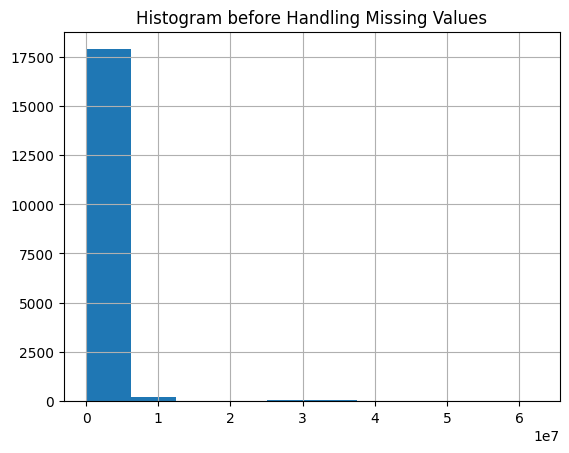

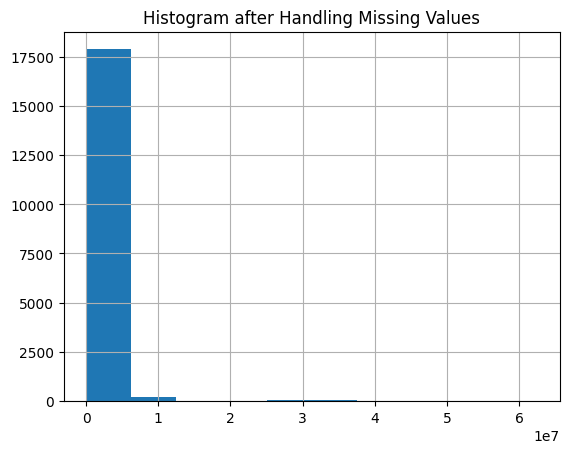

In [6]:
ds['Total Volume'].hist()
plt.title('Histogram before Handling Missing Values')
plt.show()

if ds['Total Volume'].isnull().any():
    imputer = SimpleImputer(strategy='mean')
    ds['Total Volume'] = imputer.fit_transform(ds[['Total Volume']])
ds['Total Volume'].hist()
plt.title('Histogram after Handling Missing Values')
plt.show()


As there is no missing values in the dataset there is no change in the histogram

**7.Examine the spread of data and identify which of the numerical features contains outliers and visualize it using Boxplots:**

> **Boxplots**: The box in the middle of the plot represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The length of the box represents the spread of the middle 50% of the data.



> **Whikers:** The whiskers extend from the box to the minimum and maximum values within a certain range. The range is often defined as a specified multiplier times the IQR (commonly 1.5 times the IQR).






> **Outliers:**Individual data points beyond the whiskers are often marked as dots and are considered potential outliers.








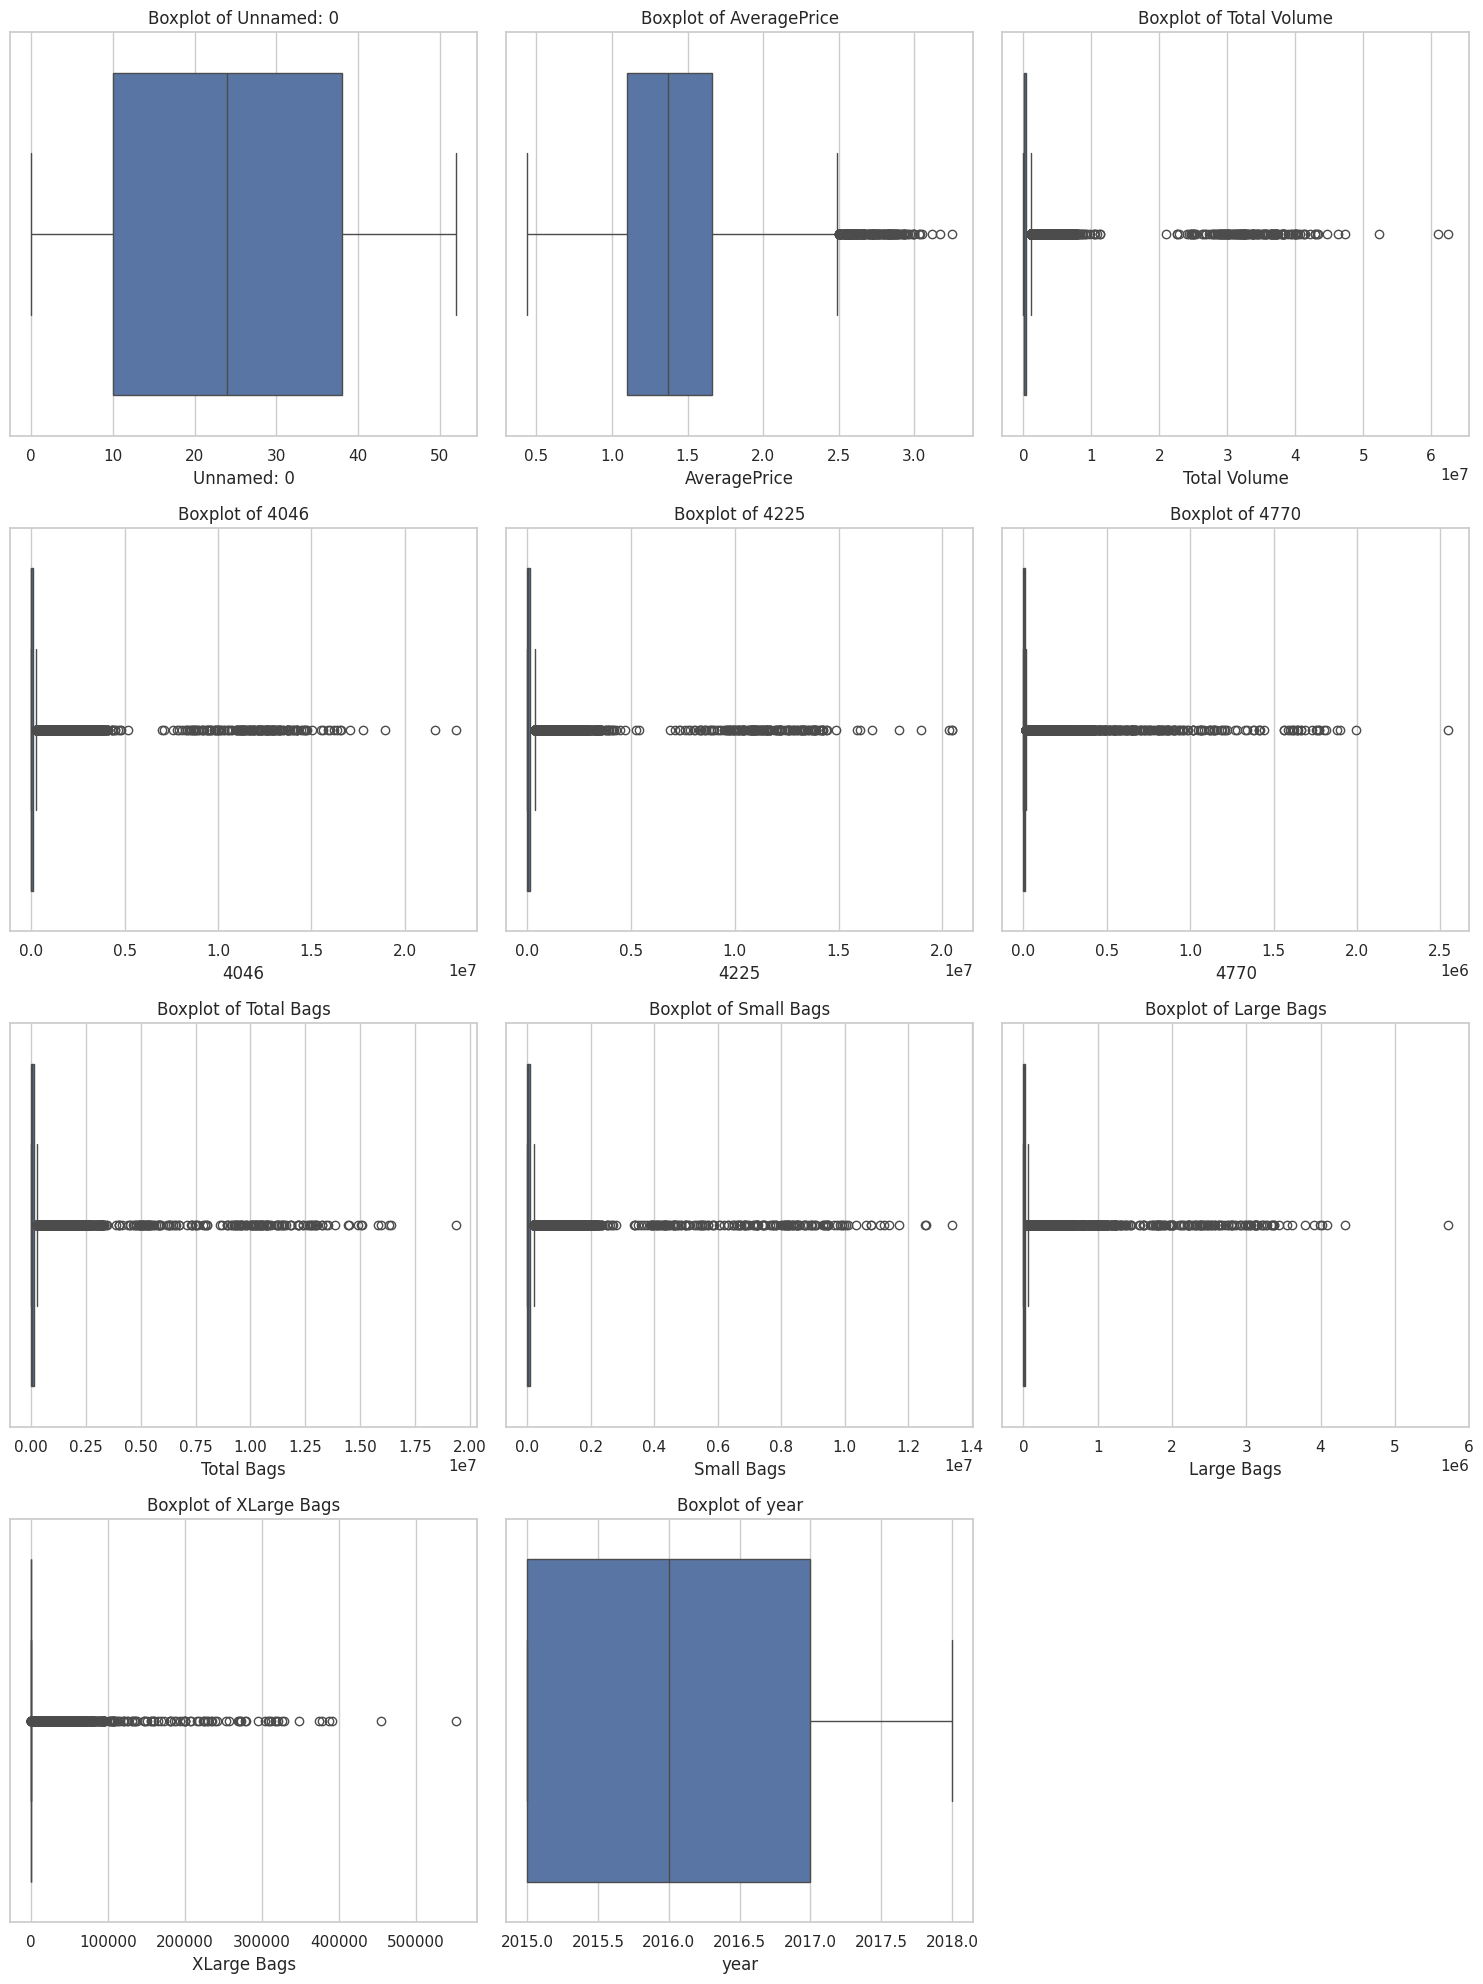

In [7]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Determine the number of rows and columns based on the number of features
num_features = len(numerical_features)
num_cols = 3  # Set the desired number of columns
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate the number of rows

# Create subplots for each numerical feature
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=ds[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


**8.Handling Outliers:**

> The lower and upper bounds are calculated to identify potential outliers. Data points below lower_bound or above upper_bound are considered potential outliers.

> The clip method is used to replace values in the column that are below the lower bound with the lower bound and values above the upper bound with the upper bound. This step effectively "clips" or limits the values within a specified range.





In [8]:
# Define a function to handle outliers using IQR
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the lower/upper bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return data

# Specify the numerical features you want to handle outliers for
numerical_features = ds.select_dtypes(exclude='object').columns

# Handle outliers for each numerical feature using the defined function
for feature in numerical_features:
    ds = handle_outliers_iqr(ds, feature)

# Display the modified DataFrame with outliers handled
print(ds)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

**9.Use Distribution plot and infer about the distribution of the each features:**

> A distribution plot is a graphical representation of the probability distribution of a dataset. It provides insights into the underlying frequency or probability distribution of the data, helping to understand the shape, spread, and central tendency.





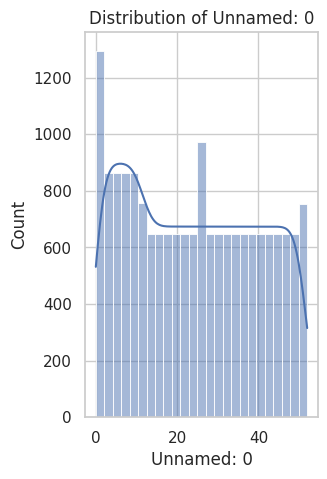

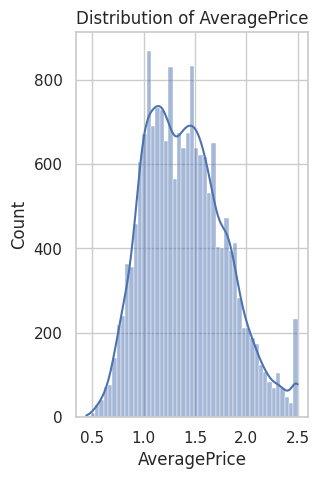

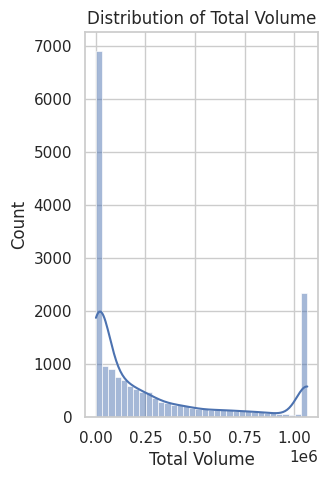

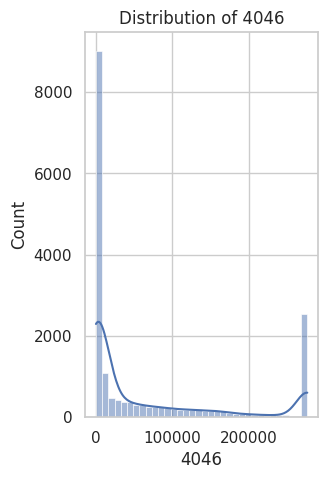

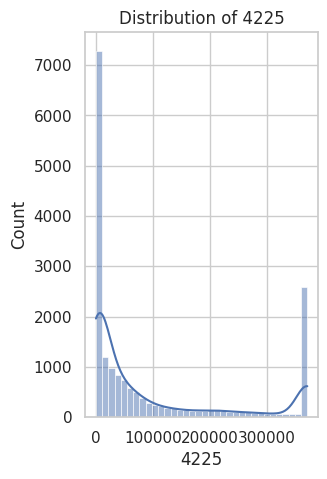

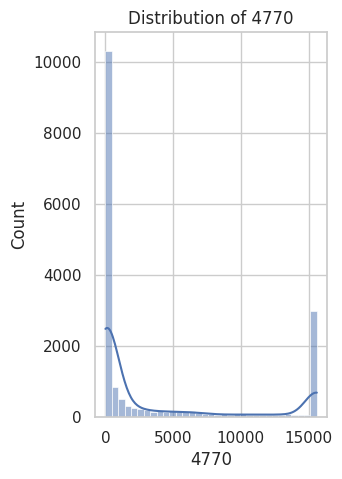

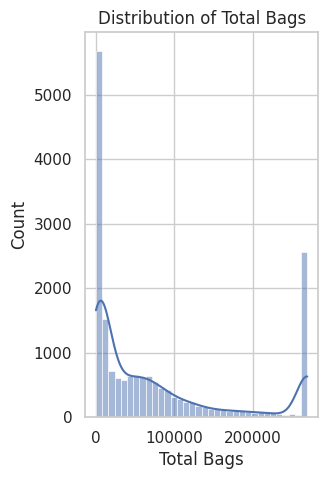

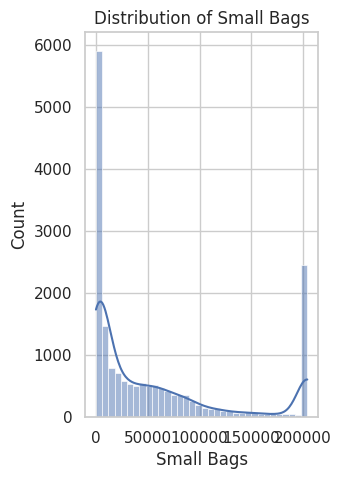

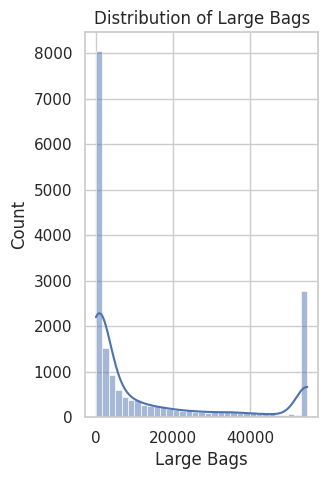

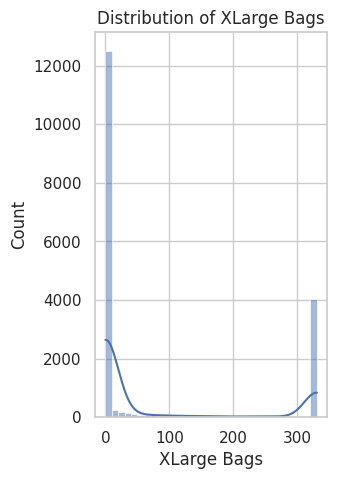

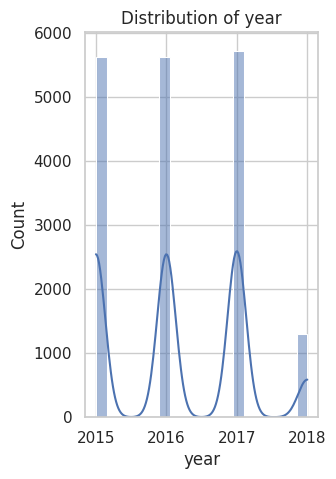

<ipython-input-9-dcde09903e71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=ds, palette='viridis')


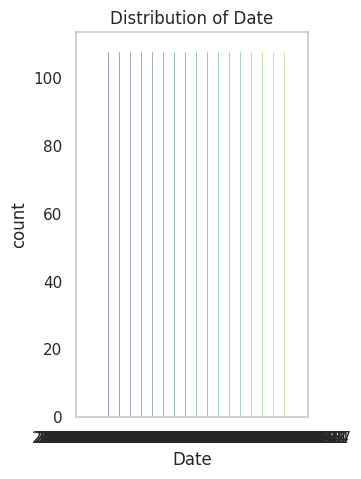

<ipython-input-9-dcde09903e71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=ds, palette='viridis')


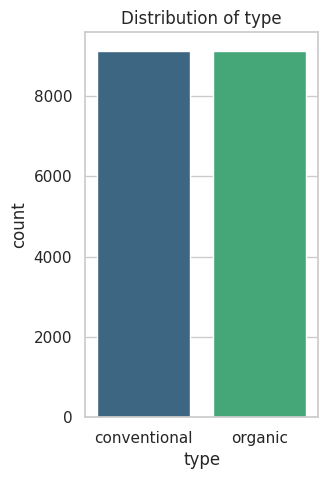

<ipython-input-9-dcde09903e71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=ds, palette='viridis')


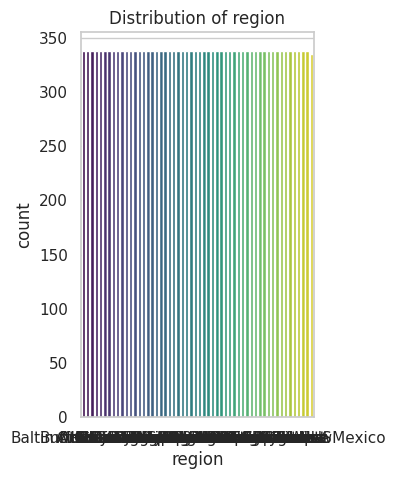

In [9]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot distribution for numerical features
numerical_features = ds.select_dtypes(exclude='object').columns
for feature in numerical_features:
    plt.figure(figsize=(3,5))
    sns.histplot(ds[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot distribution for categorical features
categorical_features = ds.select_dtypes(include='object').columns
for feature in categorical_features:
    plt.figure(figsize=(3, 5))
    sns.countplot(x=feature, data=ds, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.show()

**10.Encoding categorical values:**

> Encoding categorical values refers to the process of converting categorical data (text or labels) into numerical values. Two common encoding techniques are one-hot encoding and label encoding.

> One-hot encoding is used to represent categorical variables as binary vectors. It creates new binary columns (dummy variables) for each category in the original column, with a 1 indicating the presence of the category and 0 indicating its absence.

> Label encoding assigns a unique numerical label to each category. It is suitable when there is an ordinal relationship among categories, and the order matters.








In [10]:
# Label encode categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    ds[feature] = label_encoder.fit_transform(ds[feature])
# One-hot encode 'region' column
df = pd.get_dummies(ds, columns=['region'], prefix='region')

# Display the dataset after encoding
print("Encoded Dataset:")
print(ds)

Encoded Dataset:
       Unnamed: 0  Date  AveragePrice  Total Volume     4046       4225  \
0               0    51          1.33      64236.62  1036.74   54454.85   
1               1    50          1.35      54876.98   674.28   44638.81   
2               2    49          0.93     118220.22   794.70  109149.67   
3               3    48          1.08      78992.15  1132.00   71976.41   
4               4    47          1.28      51039.60   941.48   43838.39   
...           ...   ...           ...           ...      ...        ...   
18244           7   161          1.63      17074.83  2046.96    1529.20   
18245           8   160          1.71      13888.04  1191.70    3431.50   
18246           9   159          1.87      13766.76  1191.92    2452.79   
18247          10   158          1.93      16205.22  1527.63    2981.04   
18248          11   157          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0   

**11.Feature scaling:**

> The purpose of feature scaling is to ensure that all features contribute equally to the learning process and that no single feature dominates due to having a larger scale.




In [11]:
df.to_csv('avocado_final.csv')
# Split the dataset into training and testing sets (adjust test_size as needed)
train_data, test_data = train_test_split(ds, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_data_std = scaler.fit_transform(train_data)
test_data_std = scaler.fit_transform(test_data)

12.Generate output files:

In [12]:
train_data_std_ds = pd.DataFrame(train_data_std, columns=train_data.columns)
test_data_std_ds = pd.DataFrame(test_data_std, columns=test_data.columns)
# Save the training set to a CSV file
train_data_std_ds.to_csv('output_train.csv', index=False)

# Save the testing set to a CSV file
test_data_std_ds.to_csv('output_test.csv', index=False)